# Investment Suggestion for Cargill
## By Gamze Gizem Kasman

**Task:** The board of the Cargill company tries to have decision on new strategies. The board tries to understand which race/type of cattle is better to invest. 

As a hypothetical data scientist I am providing an analysis and recommendation to head of the department.

## Table of Contents
* [1. Choosing the Race/Type of the Cattle to Invest](#chapter1)
    * [1.1 Descriptive Analysis](#section_1_1)
        * [1.1.1 Checking for Normality ](#sub_section_1_1_1)
        * [1.1.2 Carcass ](#sub_section_1_1_2)
        * [1.1.3 Checking for Correlation ](#sub_section_1_1_3)
    * [1.2 Cost & Benefit Analysis](#section_1_2)
        * [1.2.1 Price of the Proven Materials](##sub_section_1_2_1)
        * [1.2.2 Cost of Provender](##sub_section_1_2_2)
        * [1.2.3 The Whole Picture](##sub_section_1_2_3)
    * [1.3 The Winners](#section_1_3)
        * [1.3.1. Hereford](##sub_section_1_3_1)
        * [1.3.2. Swiss](##sub_section_1_3_2)

## 1. Choosing the Race/Type of the Cattle to Invest

### 1.1 Descriptive Analysis

In [58]:
#import packages
import pandas as pd
import numpy as np
#!pip install dython
from dython.nominal import associations
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import anderson
import warnings
import statsmodels.api as sm

In [59]:
pd.options.display.max_rows = 99
pd.options.display.max_columns = 99

In [60]:
#reading data.csv
df1 = pd.read_csv('/Users/gamzekasman/Desktop/ADS 575 Midterm/Midterm Exam/Primary Data/data.csv')
print(df1.head(99))

    Unnamed: 0          id       type  birthyear  provender       weight  \
0            0  9982631585    Brahman       2014      39.83   636.154972   
1            1  9982630726   Gelbvieh       2010      28.09   539.665212   
2            2  9982629867      Swiss       2020      33.61  1050.817188   
3            3  9982629008   Gelbvieh       2010      37.61   697.358854   
4            4  9982628149   Hereford       2021      26.35   592.240015   
5            5  9982627291     Sussex       2015      36.18   860.373037   
6            6  9982626432   Ayrshire       2007      21.88   764.379008   
7            7  9982625573     Dexter       2005      28.89  1469.393884   
8            8  9982624714    Belgian       2006      37.40  1132.442392   
9            9  9982623855    Lowline       2005      20.96    59.078763   
10          10  9982622997  Shorthorn       2006      19.52   662.056928   
11          11  9982622138    Brangus       2020      33.75  1316.632496   
12          

In [61]:
#dropping unnecessary column
df1 = df1.drop("Unnamed: 0",axis = 1)

In [62]:
#reading dressing.csv
df2 = pd.read_csv('/Users/gamzekasman/Desktop/ADS 575 Midterm/Midterm Exam/Primary Data/dressing.csv')
print(df2.head(99))

    Unnamed: 0       type  dressing
0            0      Angus  0.641084
1            1   Hereford  0.757293
2            2   Gelbvieh  0.785897
3            3   Limousin  0.769290
4            4  Simmental  0.602060
5            5   Guernsey  0.604168
6            6     Dexter  0.689262
7            7  Shorthorn  0.642912
8            8     Salers  0.677809
9            9    Brahman  0.740851
10          10  Charolais  0.776884
11          11      Swiss  0.782520
12          12   Galloway  0.796354
13          13     Sussex  0.705481
14          14      Devon  0.732421
15          15    Lowline  0.703164
16          16     Jersey  0.751669
17          17   Ayrshire  0.631225
18          18    Brangus  0.619843
19          19   Longhorn  0.635736
20          20    Belgian  0.744869


In [63]:
#dropping unnecessary column
df2 = df2.drop("Unnamed: 0",axis = 1)

In [64]:
#merging df1 and df2 using the common column (type) using merge function by setting how='left'
df = pd.merge(df1, df2, 
                   on='type', 
                   how='left')
  
# displaying result
print(df.head(99))
#print(df.tail(99))

            id       type  birthyear  provender       weight       milk  \
0   9982631585    Brahman       2014      39.83   636.154972  36.462234   
1   9982630726   Gelbvieh       2010      28.09   539.665212  29.618261   
2   9982629867      Swiss       2020      33.61  1050.817188  36.636468   
3   9982629008   Gelbvieh       2010      37.61   697.358854  29.526399   
4   9982628149   Hereford       2021      26.35   592.240015  46.638990   
5   9982627291     Sussex       2015      36.18   860.373037  44.656427   
6   9982626432   Ayrshire       2007      21.88   764.379008  26.970147   
7   9982625573     Dexter       2005      28.89  1469.393884  31.357871   
8   9982624714    Belgian       2006      37.40  1132.442392  27.976560   
9   9982623855    Lowline       2005      20.96    59.078763  33.188575   
10  9982622997  Shorthorn       2006      19.52   662.056928  37.774535   
11  9982622138    Brangus       2020      33.75  1316.632496  30.980162   
12  9982621279   Galloway

In [65]:
df["id"].duplicated().sum()

0

In [66]:
df.shape

(10000000, 8)

In [67]:
df.isnull().sum()

id           0
type         0
birthyear    0
provender    0
weight       0
milk         0
fertility    0
dressing     0
dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   type       object 
 2   birthyear  int64  
 3   provender  float64
 4   weight     float64
 5   milk       float64
 6   fertility  float64
 7   dressing   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 686.6+ MB


In [112]:
df['type'] = df['type'].astype('category')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 8 columns):
 #   Column     Dtype   
---  ------     -----   
 0   id         int64   
 1   type       category
 2   birthyear  int64   
 3   provender  float64 
 4   weight     float64 
 5   milk       float64 
 6   fertility  float64 
 7   dressing   float64 
dtypes: category(1), float64(5), int64(2)
memory usage: 619.9 MB


In [114]:
df.describe()

,id,birthyear,provender,weight,milk,fertility,dressing
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,5.688705e+09,2.013000e+03,2.900313e+01,8.554223e+02,3.555938e+01,1.159926e+00,7.043551e-01
std,2.479100e+09,4.899189e+00,6.350846e+00,5.592103e+02,5.654420e+00,1.883379e-01,6.396231e-02
min,1.394778e+09,2.005000e+03,1.800000e+01,-3.552180e+02,2.359747e+01,1.000000e+00,6.020596e-01
25%,3.541742e+09,2.009000e+03,2.350000e+01,3.952542e+02,3.126402e+01,1.030000e+00,6.410844e-01
50%,5.688705e+09,2.013000e+03,2.901000e+01,7.962414e+02,3.504171e+01,1.060000e+00,7.054805e-01
75%,7.835668e+09,2.017000e+03,3.450000e+01,1.239551e+03,3.858724e+01,1.240000e+00,7.572930e-01
max,9.982632e+09,2.021000e+03,4.000000e+01,4.315015e+03,5.912978e+01,2.580000e+00,7.963535e-01


In [115]:
#to get a better understanding of the data (not to have e values)
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,id,birthyear,provender,weight,milk,fertility,dressing
count,10000000.00000,10000000.00000,10000000.00000,10000000.00000,10000000.00000,10000000.00000,10000000.00000
mean,5688704948.45172,2013.00017,29.00313,855.42226,35.55938,1.15993,0.70436
std,2479100071.04011,4.89919,6.35085,559.21034,5.65442,0.18834,0.06396
min,1394778313.00000,2005.00000,18.00000,-355.21800,23.59747,1.00000,0.60206
25%,3541741630.25000,2009.00000,23.50000,395.25417,31.26402,1.03000,0.64108
50%,5688704948.50000,2013.00000,29.01000,796.24137,35.04171,1.06000,0.70548
75%,7835668266.75000,2017.00000,34.50000,1239.55138,38.58724,1.24000,0.75729
max,9982631585.00000,2021.00000,40.00000,4315.01502,59.12978,2.58000,0.79635


In [116]:
#drop negative rows of the weight column
df = df[df.weight >= 0]

In [117]:
df.type.unique()

['Brahman', 'Gelbvieh', 'Swiss', 'Hereford', 'Sussex', ..., 'Jersey', 'Simmental', 'Guernsey', 'Salers', 'Angus']
Length: 21
Categories (21, object): ['Angus', 'Ayrshire', 'Belgian', 'Brahman', ..., 'Shorthorn', 'Simmental', 'Sussex', 'Swiss']

In [118]:
df['type'].value_counts().to_frame()

,type
Swiss,477252
Dexter,477152
Galloway,477012
Jersey,476902
Guernsey,476584
Salers,476544
Charolais,476479
Brahman,476466
Belgian,476332
Angus,476255


### 1.1.1 Checking for Normality

#### For weight

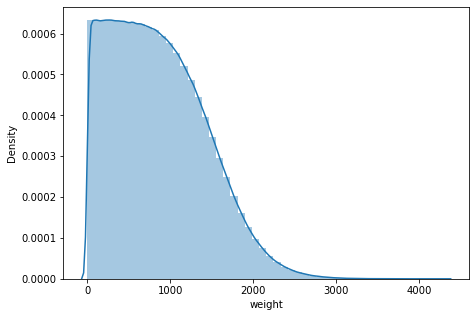

In [119]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['weight'])
plt.show()

In [120]:
#checking the normality of the weight
anderson(df.weight, dist='norm')

AndersonResult(statistic=77288.3990321178, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### For milk

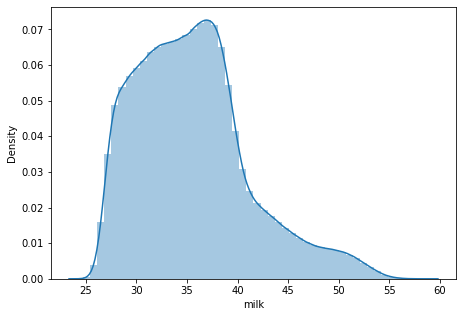

In [121]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['milk'])
plt.show()

In [122]:
#checking the normality of the milk
anderson(df.milk, dist='norm')

AndersonResult(statistic=86032.86926492862, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### For fertility

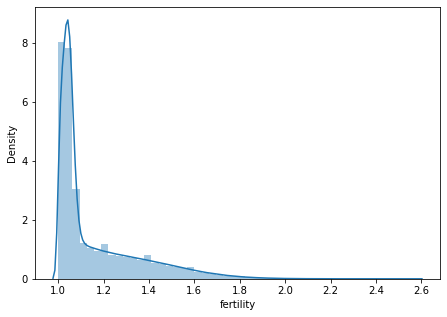

In [123]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['fertility'])
plt.show()

In [124]:
#checking the normality of the fertility
anderson(df.fertility, dist='norm')

AndersonResult(statistic=866219.3218940962, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### For provender

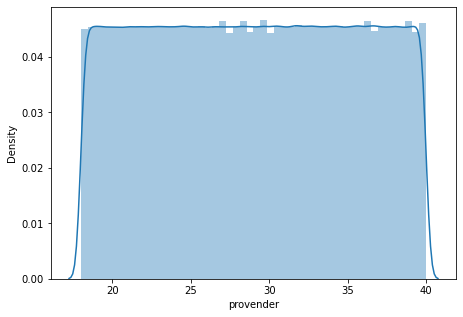

In [125]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['provender'])
plt.show()

In [126]:
#checking the normality of the fertility
anderson(df.provender, dist='norm')

AndersonResult(statistic=111123.38361102156, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### 1.1.2. Carcass
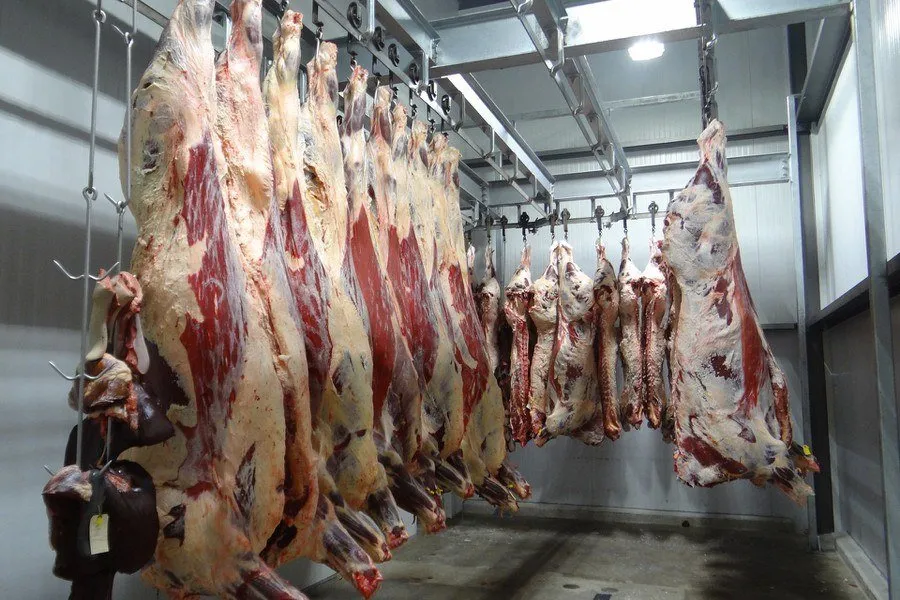
Source: https://extension.psu.edu/understanding-beef-carcass-yields-and-losses-during-processing#:~:text=As%20a%20general%20rule%2C%20most,may%20affect%20the%20carcass%20weight

> Carcass is the weight of the slaughtered cattle's cold body after being skinned, bled and eviscerated, and after removal of the external genitalia, the limbs, the head, the tail, the kidneys and kidney fats, and the udder. Carcass is the economically valuable variable therefore I add a new variable 'carcass' as below.

In [80]:
#new variable for the carcass of the cattle
df['carcass'] = df.weight*df.dressing

In [128]:
#new variable for the age of the cattle
df['age'] = 2022- df['birthyear']

In [129]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,id,birthyear,provender,weight,milk,fertility,dressing,carcass,age
count,9999884.00000,9999884.00000,9999884.00000,9999884.00000,9999884.00000,9999884.00000,9999884.00000,9999884.00000,9999884.00000
mean,5688703527.91324,2013.00017,29.00313,855.43270,35.55944,1.15993,0.70436,604.50405,8.99983
std,2479100268.56284,4.89919,6.35085,559.20515,5.65441,0.18834,0.06396,405.12474,4.89919
min,1394778313.00000,2005.00000,18.00000,0.00041,24.00780,1.00000,0.60206,0.00031,1.00000
25%,3541739054.25000,2009.00000,23.50000,395.27079,31.26408,1.03000,0.64108,275.26975,5.00000
50%,5688701513.50000,2013.00000,29.01000,796.25052,35.04177,1.06000,0.70548,554.95878,9.00000
75%,7835668266.75000,2017.00000,34.50000,1239.55726,38.58727,1.24000,0.75729,869.73257,13.00000
max,9982631585.00000,2021.00000,40.00000,4315.01502,59.12978,2.58000,0.79635,3267.73067,17.00000


> According to the Food Ingredients & Bioindustrial and Agricultural Supply Chain and Corporate Trading departments: US (and developed world) mean weight of cows is 750 kg, dressing rate is 0.63, and mean daily milk production is 28 liters. These are mean/average values for US and developed world agriculture and live stock industry. As can be seen from the table above mean weight of the cattles is 855 kg, mean dressing rate is 0.7 and mean daily production is 36 liter. They are above the US and developed world averages.

In [130]:
df.groupby(['age'])['weight', 'dressing', 'carcass', 'milk', 'fertility', 'provender'].mean()

,weight,dressing,carcass,milk,fertility,provender
age,,,,,,
1,855.968215,0.704412,604.935235,35.556298,1.160278,29.005768
2,854.986638,0.704321,604.203002,35.542411,1.159874,29.005007
3,856.858533,0.704360,605.449732,35.558925,1.160453,28.994460
4,854.886486,0.704399,604.126296,35.558770,1.159988,29.003375
5,854.656624,0.704354,603.946187,35.565493,1.159597,29.012509
6,855.020214,0.704522,604.435123,35.570841,1.159878,28.995649
7,855.288274,0.704363,604.469197,35.567527,1.159706,28.988268
8,856.916006,0.704325,605.489421,35.547010,1.160394,29.012377
9,857.201716,0.704357,605.786815,35.563312,1.160317,28.990231


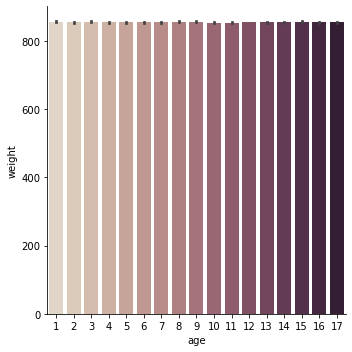

In [131]:
sns.catplot(data=df, x="age", y="weight", kind="bar",palette="ch:.25")

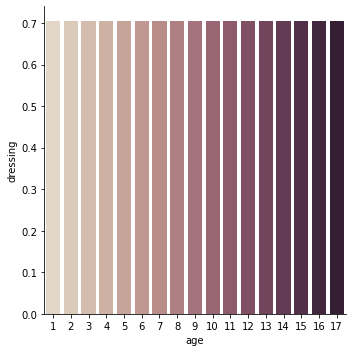

In [132]:
sns.catplot(data=df, x="age", y="dressing", kind="bar",palette="ch:.25")

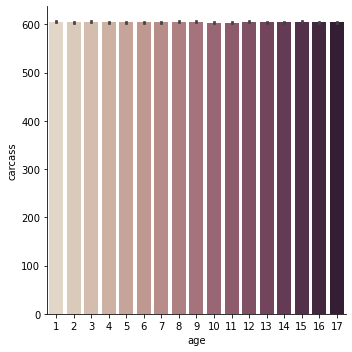

In [133]:
sns.catplot(data=df, x="age", y="carcass", kind="bar",palette="ch:.25")

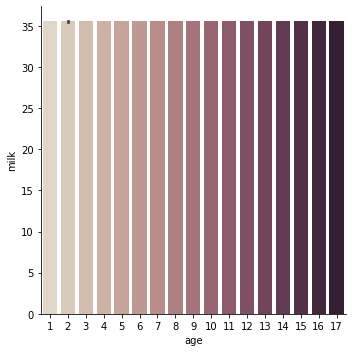

In [134]:
sns.catplot(data=df, x="age", y="milk", kind="bar",palette="ch:.25")

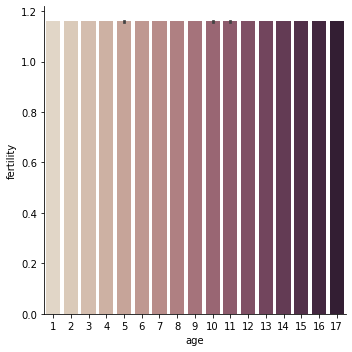

In [135]:
sns.catplot(data=df, x="age", y="fertility", kind="bar",palette="ch:.25")

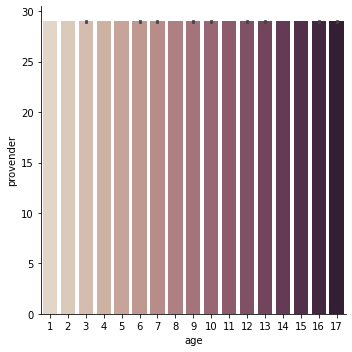

In [136]:
sns.catplot(data=df, x="age", y="provender", kind="bar",palette="ch:.25")

### 1.1.3 Checking for Correlation

In [139]:
corr=df[['age','weight', 'dressing', 'carcass', 'milk', 'fertility', 'provender']].copy()

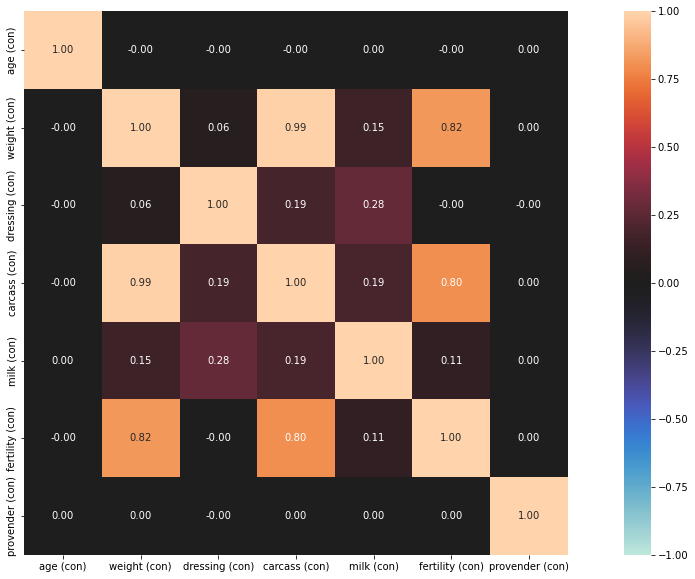

{'corr':                  age (con)  weight (con)  dressing (con)  carcass (con)  \
 age (con)         1.000000     -0.000161       -0.000273      -0.000221   
 weight (con)     -0.000161      1.000000        0.055233       0.987271   
 dressing (con)   -0.000273      0.055233        1.000000       0.187474   
 carcass (con)    -0.000221      0.987271        0.187474       1.000000   
 milk (con)        0.000334      0.150736        0.278921       0.190939   
 fertility (con)  -0.000460      0.822684       -0.000492       0.802409   
 provender (con)   0.000237      0.000195       -0.000172       0.000217   
 
                  milk (con)  fertility (con)  provender (con)  
 age (con)          0.000334        -0.000460         0.000237  
 weight (con)       0.150736         0.822684         0.000195  
 dressing (con)     0.278921        -0.000492        -0.000172  
 carcass (con)      0.190939         0.802409         0.000217  
 milk (con)         1.000000         0.105843         0.0

In [140]:
associations(corr,figsize=(20,10),mark_columns=True)

In [141]:
df.groupby('fertility')['weight'].mean()

fertility
1.00     479.576761
1.01     470.358614
1.02     455.386400
1.03     442.054201
1.04     448.197571
           ...     
2.48    4189.841799
2.52    3086.308159
2.53    3056.677869
2.56    3010.562711
2.58    3044.072023
Name: weight, Length: 153, dtype: float64

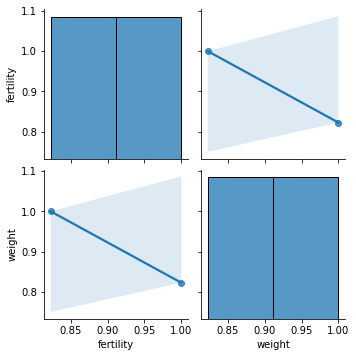

In [142]:
corr1= df[['fertility','weight']].copy()
pair1=corr1.corr()
sns.pairplot(pair1,kind='reg')

## 1.2. Cost & Benefit Analysis

In [3]:
#reading ProvenMaterialPercentages.csv
df3 = pd.read_csv('/Users/gamzekasman/Desktop/ADS 575 Midterm/Midterm Exam/Primary Data/ProvenMaterialPercentages.csv')
print(df3)

        Proven  Dry Metter  Protein  Calsium  Crude Protein  Nutrient  \
0    Grass Hay        0.75     0.10     0.08           0.03      0.02   
1      Alfalfa        0.64     0.15     0.10           0.05      0.03   
2  Silver Star        0.40     0.16     0.14           0.10      0.08   

   Vitamin Mix  Supplement  
0         0.01        0.01  
1         0.02        0.01  
2         0.07        0.05  


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Proven         3 non-null      object 
 1   Dry Metter     3 non-null      float64
 2   Protein        3 non-null      float64
 3   Calsium        3 non-null      float64
 4   Crude Protein  3 non-null      float64
 5   Nutrient       3 non-null      float64
 6   Vitamin Mix    3 non-null      float64
 7   Supplement     3 non-null      float64
dtypes: float64(7), object(1)
memory usage: 320.0+ bytes


In [4]:
#reading ProvenMaterialPrices.csv
df4 = pd.read_csv('/Users/gamzekasman/Desktop/ADS 575 Midterm/Midterm Exam/Primary Data/ProvenMaterialPrices.csv')
print(df4)

   Dry Metter  Protein  Calsium  Crude Protein  Nutrient  Vitamin Mix  \
0         100      150      250            300       330          360   

   Supplement  
0         500  


In [8]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Dry Metter     1 non-null      int64
 1   Protein        1 non-null      int64
 2   Calsium        1 non-null      int64
 3   Crude Protein  1 non-null      int64
 4   Nutrient       1 non-null      int64
 5   Vitamin Mix    1 non-null      int64
 6   Supplement     1 non-null      int64
dtypes: int64(7)
memory usage: 184.0 bytes


### 1.2.1 Price of the Proven Materials

In [36]:
#price of Dry Metter
df3['Price DM'] = df3['Dry Metter'] * 100

In [35]:
#price of Protein
df3['Price P'] = df3['Protein'] * 150

In [34]:
#price of Calsium
df3['Price C'] = df3['Calsium'] * 250

In [33]:
#price of Crude Protein
df3['Price CP'] = df3['Crude Protein'] * 300

In [32]:
#price of Nutrient
df3['Price N'] = df3['Nutrient'] * 330

In [31]:
#price of Vitamin Mix
df3['Price VM'] = df3['Vitamin Mix'] * 360

In [37]:
#price of Supplement
df3['Price S'] = df3['Supplement'] * 500

In [38]:
df3

,Proven,Dry Metter,Protein,Calsium,Crude Protein,Nutrient,Vitamin Mix,Supplement,Price DM,Price P,Price C,Price CP,Price N,Price VM,Price S
0,Grass Hay,0.75,0.10,0.08,0.03,0.02,0.01,0.01,75.0,15.0,20.0,9.0,6.6,3.6,5.0
1,Alfalfa,0.64,0.15,0.10,0.05,0.03,0.02,0.01,64.0,22.5,25.0,15.0,9.9,7.2,5.0
2,Silver Star,0.40,0.16,0.14,0.10,0.08,0.07,0.05,40.0,24.0,35.0,30.0,26.4,25.2,25.0


In [48]:
#new variable for the price of the Proven Material : Grass Hay 
pricegh= df3.iloc[0, 8:15].sum()
print(pricegh)

134.2


In [49]:
#new variable for the price of the Proven Material : Alfaalfa
priceaa= df3.iloc[1, 8:15].sum()
print(priceaa)

148.6


In [50]:
#new variable for the price of the Proven Material : Silver Star
pricess= df3.iloc[2, 8:15].sum()
print(pricess)

205.60000000000002


### 1.2.2 Cost of Provender

In [74]:
#new variable for the price of the Provender if the cattle eats Grass Hay
df['provencecostgh'] = df.provender * 134.2
print(df.provencecostgh.head())

0    5345.186
1    3769.678
2    4510.462
3    5047.262
4    3536.170
Name: provencecostgh, dtype: float64


In [75]:
#new variable for the price of the Provender if the cattle eats Alfaalfa
df['provencecostaa'] = df.provender * 148.6
print(df.provencecostaa.head())

0    5918.738
1    4174.174
2    4994.446
3    5588.846
4    3915.610
Name: provencecostaa, dtype: float64


In [78]:
#new variable for the price of the Provender if the cattle eats Silver Star
df['provencecostss'] = df.provender * 205.60000000000002
print(df.provencecostss.head())

0    8189.048
1    5775.304
2    6910.216
3    7732.616
4    5417.560
Name: provencecostss, dtype: float64


### 1.2.3 The Whole Picture

In [87]:
df.groupby(['type'])[['carcass', 'milk', 'fertility', 'provencecostgh', 'provencecostaa', 'provencecostss']].mean().sort_values(['carcass', 'milk', 'fertility'],
              ascending = [False, False, False])

,carcass,milk,fertility,provencecostgh,provencecostaa,provencecostss
type,,,,,,
Hereford,839.371138,44.781289,1.159678,3892.265431,4309.915373,5963.113059
Swiss,836.262955,44.783050,1.159873,3893.962966,4311.795057,5965.713754
Limousin,731.742742,36.492720,1.160133,3889.624456,4306.991015,5959.066976
Devon,684.552244,39.158307,1.160168,3891.740911,4309.334571,5962.309474
Charolais,675.245212,38.148394,1.159342,3891.223685,4308.761845,5961.517062
Angus,659.506420,33.168130,1.159595,3891.614686,4309.194801,5962.116091
Galloway,630.757040,33.175015,1.159706,3893.884503,4311.708176,5965.593546
Dexter,628.112672,33.180824,1.160151,3894.270037,4312.135078,5966.184200
Gelbvieh,622.763991,33.182757,1.159882,3891.030127,4308.547517,5961.220522


## 1.3 The Winners

### 1.3.1. Hereford

According to the results of the table above, on average type 'Hereford' has the heaviest carcass, ranks second in milk production and average fertility. In terms of the cost Hereford has average provender cost.

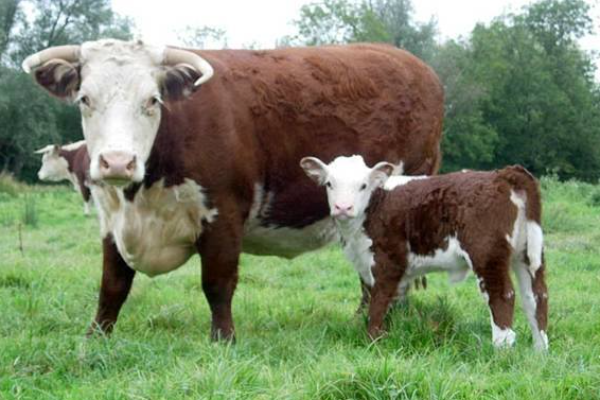

Herefords are generally docile and fast growing cattle with good beef quality.

#### "Statistics

Greater weight for age and rate of gain either at pasture or on yard feeding

The ability to command top prices in the markets as finished beef or as store cattle

A higher selling price for breeding stock

Greater economy of gain in feeding

High percentage of calf crops

Lower wintering costs

Docility and ease of management

Lower labour costs

Early maturity and longevity"

### 1.3.2. Swiss

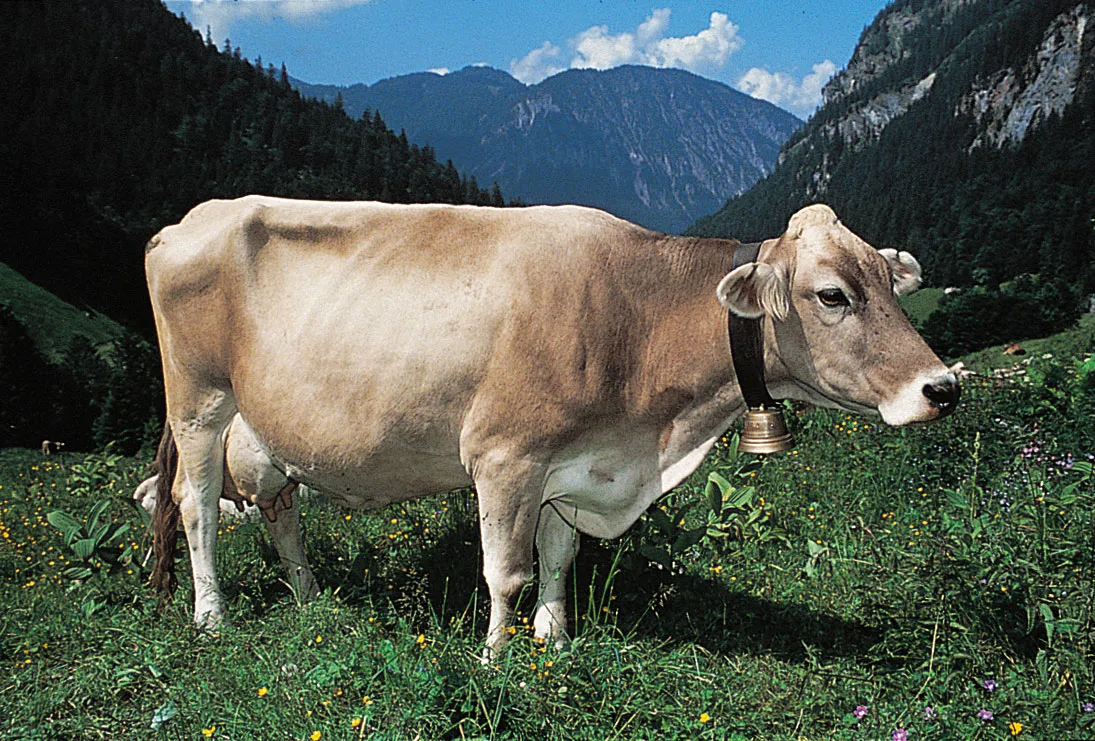

According to the results of the table above on average type 'Swiss' has the second heaviest carcass with the most milk production and average fertility. In terms of the cost Hereford has average provender cost.

#### "Statistics

Close protein/fat ratio - Brown Swiss milk possesses the closest protein/fat ratio of any dairy breed.

Feet and legs - Properly structured legs allies to strong, hard, black, well formed feet, that mean Brown Swiss cattle have few problems. No doubt this is one of the key qualities that enable many Brown Swiss to continue producing in the herd until they are 12-15 years of age.

Quiet Temperament - Dairymen, members of the association, all of whom have worked with a variety of breeds are completely unanimous in their praise of the docile temperament and inquisitive nature of these quiet cattle.

Longevity - The characteristic longevity of the breed is very evident in the Brown Swiss. While the breed tends to be later maturing than other breeds, cows tend to reach their peak in 5th or later lactations. Some breeds find it difficult to reach this stage, while the strength of the Brown Swiss allows them to lead long productive lives.

Strength & Hybrid Vigour - Brown Swiss cows are cattle of great substance and strength. The experience of having cows ‘go down’ with metabolic problems or any other reason is rare amongst Brown Swiss owners.

Brown Swiss are renowned for their role when crossed with other dairy breeds or for that fact with beef breeds as well, in generally improving the production and strength of the parent breed. This is evident throughout the world from the tropics to the alpine regions.

Braunvieh bulls are noted for their scrotal and testicular development at a young age and are capable, fertile breeders at 12 to 14 months of age."